# Multimodal Sentiments Analysis
I tried to use early fusion tequniques for this task, but somehow the approach I had been using was taking too much training time and due to hardware constraints over my device as well as Google Colab, I had not been able to complete the training and had to interrupt the training.

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define paths
data_path = "/content/drive/My Drive/Multimodal_dataset_assignment3/labels.csv"
image_folder = "/content/drive/My Drive/Multimodal_dataset_assignment3/images/"

# Load dataset
df = pd.read_csv(data_path)

# Add full image path to dataframe
df["image_path"] = df["image_name"].apply(lambda x: os.path.join(image_folder, x))


In [ ]:
df.head()

Unnamed: 0    image_name  \
0           0   image_1.jpg   
1           1  image_2.jpeg   
2           2   image_3.JPG   
3           3   image_4.png   
4           4   image_5.png   

                                            text_ocr  \
0  LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...   
1  The best of #10 YearChallenge! Completed in le...   
2  Sam Thorne @Strippin ( Follow Follow Saw every...   
3              10 Year Challenge - Sweet Dee Edition   
4  10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...   

                                      text_corrected      humour  \
0  LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...   hilarious   
1  The best of #10 YearChallenge! Completed in le...   not_funny   
2  Sam Thorne @Strippin ( Follow Follow Saw every...  very_funny   
3              10 Year Challenge - Sweet Dee Edition  very_funny   
4  10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...   hilarious   

           sarcasm       offensive      motivational overall_sentiment  \
0          general   not_offensive  not_motivational     very_positive   
1          general   not_offensive      motivational     very_positive   
2    not_sarcastic   not_offensive  not_motivational          positive   
3  twisted_meaning  very_offensive      motivational          positive   
4     very_twisted  very_offensive  not_motivational           neutral   

                                          image_path  
0  /content/drive/My Drive/Multimodal_dataset_ass...  
1  /content/drive/My Drive/Multimodal_dataset_ass...  
2  /content/drive/My Drive/Multimodal_dataset_ass...  
3  /content/drive/My Drive/Multimodal_dataset_ass...  
4  /content/drive/My Drive/Multimodal_dataset_ass...

In [ ]:
print(df.info())     # Checking basic information about the data
df.isnull().sum()    # Checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6992 entries, 0 to 6991
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         6992 non-null   int64 
 1   image_name         6992 non-null   object
 2   text_ocr           6831 non-null   object
 3   text_corrected     6987 non-null   object
 4   humour             6992 non-null   object
 5   sarcasm            6992 non-null   object
 6   offensive          6992 non-null   object
 7   motivational       6992 non-null   object
 8   overall_sentiment  6992 non-null   object
 9   image_path         6992 non-null   object
dtypes: int64(1), object(9)
memory usage: 546.4+ KB
None


Unnamed: 0             0
image_name             0
text_ocr             161
text_corrected         5
humour                 0
sarcasm                0
offensive              0
motivational           0
overall_sentiment      0
image_path             0
dtype: int64

In [ ]:
df.dropna(inplace=True)      # Dropping null values

In [ ]:
print(df['humour'].value_counts())
print(df['sarcasm'].value_counts())
print(df['offensive'].value_counts())
print(df['motivational'].value_counts())
print(df['overall_sentiment'].value_counts())   # Checking for any imbalance in Data

humour
funny         2394
very_funny    2176
not_funny     1618
hilarious      642
Name: count, dtype: int64
sarcasm
general            3430
not_sarcastic      1516
twisted_meaning    1499
very_twisted        385
Name: count, dtype: int64
offensive
not_offensive        2657
slight               2536
very_offensive       1424
hateful_offensive     213
Name: count, dtype: int64
motivational
not_motivational    4421
motivational        2409
Name: count, dtype: int64
overall_sentiment
positive         3057
neutral          2157
very_positive    1001
negative          469
very_negative     146
Name: count, dtype: int64


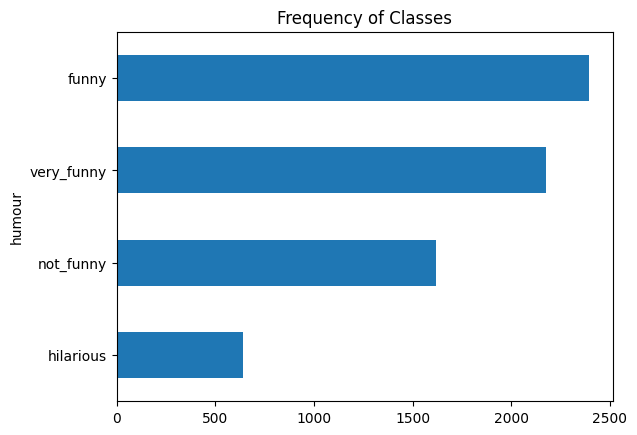

In [ ]:
label_counts = df['humour'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

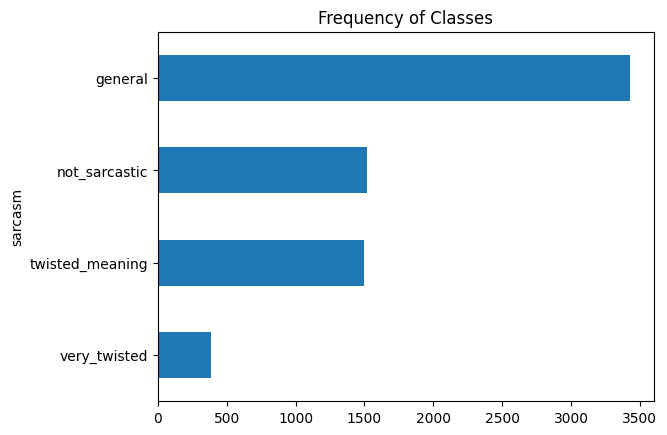

In [ ]:
label_counts = df['sarcasm'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

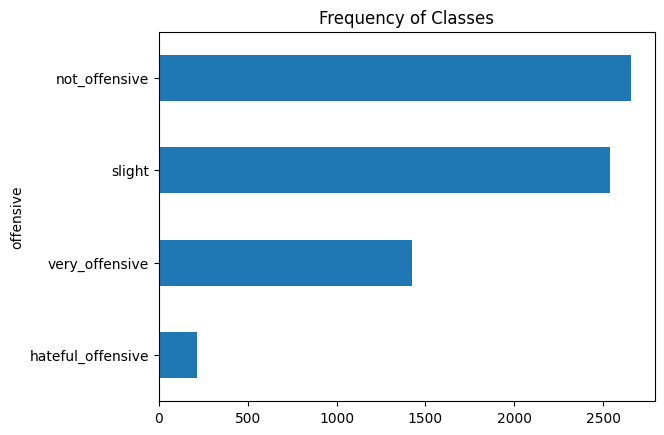

In [ ]:
label_counts = df['offensive'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

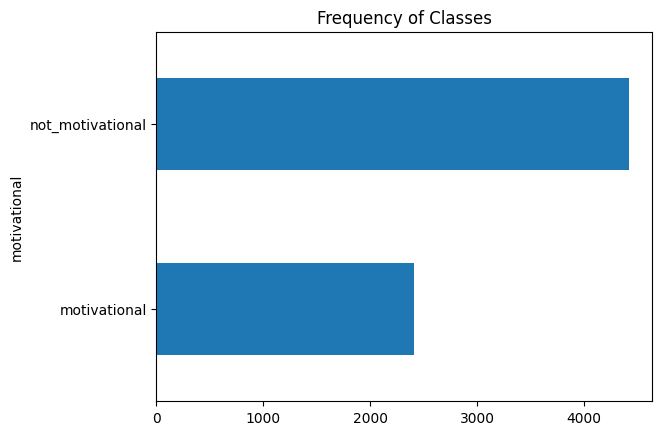

In [ ]:
label_counts = df['motivational'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

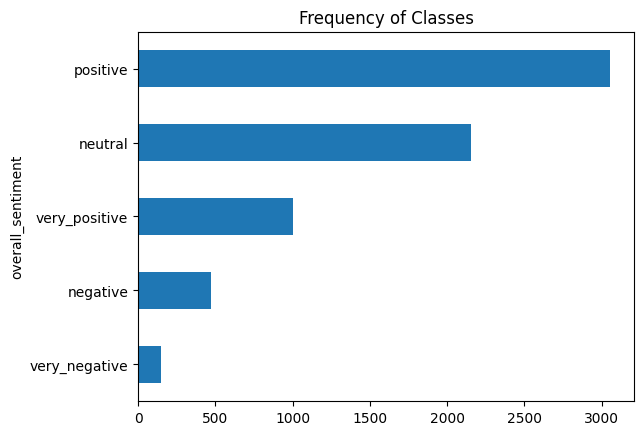

In [ ]:
label_counts = df['overall_sentiment'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [ ]:
# Defining mappings for categorical labels
humour_map = {'not_funny': 0, 'funny': 1, 'very_funny': 2, 'hilarious': 3}
sarcasm_map = {'not_sarcastic': 0, 'general': 1, 'twisted_meaning': 2, 'very_twisted': 3}
offensive_map = {'not_offensive': 0, 'slight': 1, 'very_offensive': 2, 'hateful_offensive': 3}
motivational_map = {'not_motivational': 0, 'motivational': 1}
sentiment_map = {'very_negative': 0, 'negative': 1, 'neutral': 2, 'positive': 3, 'very_positive': 4}

# Applying mappings
df["humour"] = df["humour"].map(humour_map)
df["sarcasm"] = df["sarcasm"].map(sarcasm_map)
df["offensive"] = df["offensive"].map(offensive_map)
df["motivational"] = df["motivational"].map(motivational_map)
df["overall_sentiment"] = df["overall_sentiment"].map(sentiment_map)

# Convertings labels to integer type
label_columns = ["humour", "sarcasm", "offensive", "motivational", "overall_sentiment"]
df[label_columns] = df[label_columns].astype(int)

In [ ]:
df.head()

Unnamed: 0    image_name  \
0           0   image_1.jpg   
1           1  image_2.jpeg   
2           2   image_3.JPG   
3           3   image_4.png   
4           4   image_5.png   

                                            text_ocr  \
0  LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...   
1  The best of #10 YearChallenge! Completed in le...   
2  Sam Thorne @Strippin ( Follow Follow Saw every...   
3              10 Year Challenge - Sweet Dee Edition   
4  10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...   

                                      text_corrected  humour  sarcasm  \
0  LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...       3        1   
1  The best of #10 YearChallenge! Completed in le...       0        1   
2  Sam Thorne @Strippin ( Follow Follow Saw every...       2        0   
3              10 Year Challenge - Sweet Dee Edition       2        2   
4  10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...       3        3   

   offensive  motivational  overall_sentiment  \
0          0             0                  4   
1          0             1                  4   
2          0             0                  3   
3          2             1                  3   
4          2             0                  2   

                                          image_path  
0  /content/drive/My Drive/Multimodal_dataset_ass...  
1  /content/drive/My Drive/Multimodal_dataset_ass...  
2  /content/drive/My Drive/Multimodal_dataset_ass...  
3  /content/drive/My Drive/Multimodal_dataset_ass...  
4  /content/drive/My Drive/Multimodal_dataset_ass...

<Axes: title={'center': 'Words per Review'}, xlabel='overall_sentiment'>

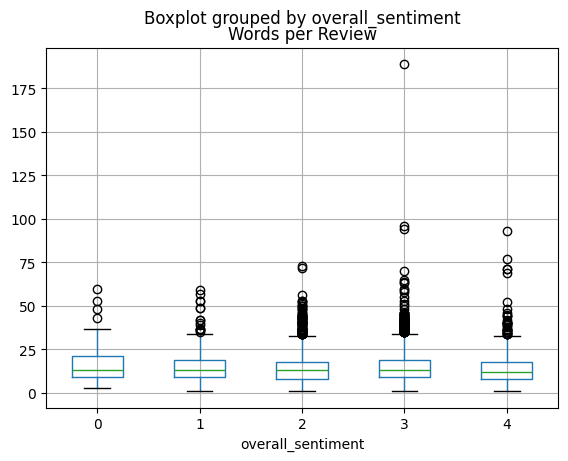

In [ ]:
df['Words per Review'] = df['text_corrected'].str.split().apply(len)          # Checking words per review in the dataset.
df.boxplot("Words per Review", by="overall_sentiment")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel
from PIL import Image
from sklearn.model_selection import train_test_split


/usr/local/lib/python3.11/dist-packages/torch_xla/__init__.py:253: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


In [ ]:
# Spliting dataset into train and validation sets
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
class MemotionDataset(Dataset):                                 # A Custom Dataset designed for handling multimodal dataset where each sample consists of text and image
    def __init__(self, dataframe, tokenizer, transform=None):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        text = row["text_corrected"]
        image_path = row["image_path"]
        labels = torch.tensor(row[["humour", "sarcasm", "offensive", "motivational", "overall_sentiment"]].astype(int).values, dtype=torch.long)


        # Load and transform image
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        # Tokenize text
        encoded_text = self.tokenizer(text, padding="max_length", truncation=True, return_tensors="pt")

        return {
            "input_ids": encoded_text["input_ids"].squeeze(),
            "attention_mask": encoded_text["attention_mask"].squeeze(),
            "image": image,
            "labels": labels
        }



In [ ]:
# Image transformations
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Loading tokenizer for text processing
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Creating datasets
train_dataset = MemotionDataset(train_df, tokenizer, transform=image_transform)
test_dataset = MemotionDataset(test_df, tokenizer, transform=image_transform)

# Creating dataloaders
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [ ]:
class MultimodalModel(nn.Module):
    def __init__(self, num_classes_list):
        super(MultimodalModel, self).__init__()

        # Text Model (DISTILBERT)
        self.text_encoder = AutoModel.from_pretrained("distilbert-base-uncased")
        self.text_fc = nn.Linear(768, 128)  # Reducing BERT output to 128-dim

        # Image Model (ResNet-18)
        self.resnet = models.resnet18(pretrained=True)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, 128)  # Modifying ResNet FC layer

        # Fusion and classification layers for each task
        self.fc_humour = nn.Linear(256, num_classes_list[0])
        self.fc_sarcasm = nn.Linear(256, num_classes_list[1])
        self.fc_offensive = nn.Linear(256, num_classes_list[2])
        self.fc_motivational = nn.Linear(256, num_classes_list[3])
        self.fc_sentiment = nn.Linear(256, num_classes_list[4])

    def forward(self, text_inputs, image):
        # Processing text
        text_output = self.text_encoder(input_ids=text_inputs["input_ids"], attention_mask=text_inputs["attention_mask"]).last_hidden_state[:, 0, :]
        text_features = self.text_fc(text_output)

        # Processing image
        image_features = self.resnet(image)

        # Concatenating text and image features
        fused_features = torch.cat((text_features, image_features), dim=1)

        # Predictions for each task
        humour = self.fc_humour(fused_features)
        sarcasm = self.fc_sarcasm(fused_features)
        offensive = self.fc_offensive(fused_features)
        motivational = self.fc_motivational(fused_features)
        sentiment = self.fc_sentiment(fused_features)

        return humour, sarcasm, offensive, motivational, sentiment




In [ ]:
# Moving model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultimodalModel(num_classes_list=[4, 4, 4, 2, 5]).to(device)  # Adjust for each label category

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training Loop with Batch-wise Validation Loss
num_epochs = 1

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0

    for batch in train_dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        images = batch["image"].to(device)
        labels = batch["labels"].to(device)  # Shape: (batch_size, 5)

        # Forward pass
        text_inputs = {"input_ids": input_ids, "attention_mask": attention_mask}
        humour, sarcasm, offensive, motivational, sentiment = model(text_inputs, images)

        # Computing losses for each task
        loss_humour = criterion(humour, labels[:, 0])
        loss_sarcasm = criterion(sarcasm, labels[:, 1])
        loss_offensive = criterion(offensive, labels[:, 2])
        loss_motivational = criterion(motivational, labels[:, 3])
        loss_sentiment = criterion(sentiment, labels[:, 4])

        # Combining the losses
        total_loss = (loss_humour + loss_sarcasm + loss_offensive + loss_motivational + loss_sentiment) / 5

        # Backpropagation
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

        total_train_loss += total_loss.item()

        print(f"Epoch {epoch+1}, Batch Loss: {total_loss.item():.4f}")

    print(f"Epoch {epoch+1} Finished, Train Loss: {total_train_loss/len(train_dataloader):.4f}")



/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1, Batch Loss: 1.2987
Epoch 1, Batch Loss: 1.2071
Epoch 1, Batch Loss: 1.1628
Epoch 1, Batch Loss: 1.2224
Epoch 1, Batch Loss: 1.1510


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1, Batch Loss: 1.1500
Epoch 1, Batch Loss: 1.0978
Epoch 1, Batch Loss: 1.1567
Epoch 1, Batch Loss: 1.2315
Epoch 1, Batch Loss: 1.0493
Epoch 1, Batch Loss: 1.1402
Epoch 1, Batch Loss: 1.2360
Epoch 1, Batch Loss: 1.2187
Epoch 1, Batch Loss: 1.2000


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1, Batch Loss: 1.1510
Epoch 1, Batch Loss: 1.1656
Epoch 1, Batch Loss: 1.1711
Epoch 1, Batch Loss: 1.0942
Epoch 1, Batch Loss: 1.1235
Epoch 1, Batch Loss: 1.1127
Epoch 1, Batch Loss: 1.0547
Epoch 1, Batch Loss: 1.1113
Epoch 1, Batch Loss: 1.0921
Epoch 1, Batch Loss: 1.1238
Epoch 1, Batch Loss: 1.0830
Epoch 1, Batch Loss: 1.2374
Epoch 1, Batch Loss: 1.1360
Epoch 1, Batch Loss: 1.1204
Epoch 1, Batch Loss: 1.0851
Epoch 1, Batch Loss: 1.1509
Epoch 1, Batch Loss: 1.1579
Epoch 1, Batch Loss: 1.0951
Epoch 1, Batch Loss: 1.1057
Epoch 1, Batch Loss: 1.1574
Epoch 1, Batch Loss: 1.1219
Epoch 1, Batch Loss: 1.1567
Epoch 1, Batch Loss: 1.1241
Epoch 1, Batch Loss: 1.1262
Epoch 1, Batch Loss: 1.1269
Epoch 1, Batch Loss: 1.1392
Epoch 1, Batch Loss: 1.1733
Epoch 1, Batch Loss: 1.1695
Epoch 1, Batch Loss: 1.1114
Epoch 1, Batch Loss: 1.2265
Epoch 1, Batch Loss: 1.0356
Epoch 1, Batch Loss: 1.0944
Epoch 1, Batch Loss: 1.1102
Epoch 1, Batch Loss: 1.0627
Epoch 1, Batch Loss: 1.3208
Epoch 1, Batch Loss:

KeyboardInterrupt: 

Since the previous code cell had already beeen running for more than 2 hrs and very few batches were processed, I decided to make a keybord interrupt and make evaluations at this point only.

In [ ]:
from sklearn.metrics import accuracy_score
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        image = batch["image"].to(device)
        labels = batch["labels"].to(device)

        # Forward pass
        text_inputs = {"input_ids": input_ids, "attention_mask": attention_mask}
        outputs = model(text_inputs, image)

        # Getting predictions
        preds = [torch.argmax(output, dim=1).cpu().numpy() for output in outputs]
        labels = labels.cpu().numpy()

        all_preds.append(np.stack(preds, axis=1))
        all_labels.append(labels)

# Computing Accuracy
all_preds = np.concatenate(all_preds, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

for i, col in enumerate(["humour", "sarcasm", "offensive", "motivational", "overall_sentiment"]):
    acc = accuracy_score(all_labels[:, i], all_preds[:, i])
    print(f"{col} Accuracy: {acc:.4f}")




humour Accuracy: 0.3377
sarcasm Accuracy: 0.4876
offensive Accuracy: 0.3968
motivational Accuracy: 0.6481
overall_sentiment Accuracy: 0.4612


In [ ]:
import torch

# Defining the path where you want to save the model
model_path = "/content/drive/MyDrive/my_model.pth"

# Saving the model
torch.save(model.state_dict(), model_path)
print(f"Model saved at {model_path}")